In [3]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [4]:
# Creates two identical panels.  Zooming in on the right panel will show
# a rectangle in the first panel, denoting the zoomed region.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


# We just subclass Rectangle so that it can be called with an Axes
# instance, causing the rectangle to update its shape to match the
# bounds of the Axes
class UpdatingRect(Rectangle):
    def __call__(self, ax):
        self.set_bounds(*ax.viewLim.bounds)
        ax.figure.canvas.draw_idle()


# A class that will regenerate a fractal set as we zoom in, so that you
# can actually see the increasing detail.  A box in the left panel will show
# the area to which we are zoomed.
class MandelbrotDisplay(object):
    def __init__(self, h=500, w=500, niter=50, radius=2., power=2):
        self.height = h
        self.width = w
        self.niter = niter
        self.radius = radius
        self.power = power

    def __call__(self, xstart, xend, ystart, yend):
        self.x = np.linspace(xstart, xend, self.width)
        self.y = np.linspace(ystart, yend, self.height).reshape(-1, 1)
        c = self.x + 1.0j * self.y
        threshold_time = np.zeros((self.height, self.width))
        z = np.zeros(threshold_time.shape, dtype=np.complex)
        mask = np.ones(threshold_time.shape, dtype=np.bool)
        for i in range(self.niter):
            z[mask] = z[mask]**self.power + c[mask]
            mask = (np.abs(z) < self.radius)
            threshold_time += mask
        return threshold_time

    def ax_update(self, ax):
        ax.set_autoscale_on(False)  # Otherwise, infinite loop

        # Get the number of points from the number of pixels in the window
        dims = ax.axesPatch.get_window_extent().bounds
        self.width = int(dims[2] + 0.5)
        self.height = int(dims[2] + 0.5)

        # Get the range for the new area
        xstart, ystart, xdelta, ydelta = ax.viewLim.bounds
        xend = xstart + xdelta
        yend = ystart + ydelta

        # Update the image object with our new data and extent
        im = ax.images[-1]
        im.set_data(self.__call__(xstart, xend, ystart, yend))
        im.set_extent((xstart, xend, ystart, yend))
        ax.figure.canvas.draw_idle()

md = MandelbrotDisplay()
Z = md(-2., 0.5, -1.25, 1.25)

fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Z, origin='lower', extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()))
ax2.imshow(Z, origin='lower', extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()))

rect = UpdatingRect([0, 0], 0, 0, facecolor='None', edgecolor='black', linewidth=1.0)
rect.set_bounds(*ax2.viewLim.bounds)
ax1.add_patch(rect)

# Connect for changing the view limits
ax2.callbacks.connect('xlim_changed', rect)
ax2.callbacks.connect('ylim_changed', rect)

ax2.callbacks.connect('xlim_changed', md.ax_update)
ax2.callbacks.connect('ylim_changed', md.ax_update)
ax2.set_title("Zoom here")

plt.show()

Using matplotlib backend: Qt5Agg


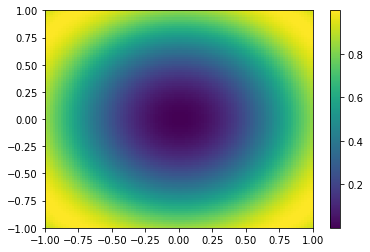

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial

fig = plt.figure()
y, x = np.mgrid[-1:1:100j, -1:1:100j]
z = np.sin(x**2 + y**2)
pcm = plt.pcolormesh(x, y, z)

def onclick_cbar(cbar, event):
    if event.inaxes is cbar.ax:
        #print(cbar.mappable)
        #print(cbar.mappable.get_clim())
        #print(event.xdata, event.ydata)
        pcm.set_clim((0.0, event.ydata))
        fig.canvas.draw()

cbar = plt.colorbar()
cid = fig.canvas.mpl_connect('button_press_event', partial(onclick_cbar, cbar))
plt.show()

In [6]:
#create and plot a test image with colorbar,
#zoom and everything works
import numpy as np
N=100
a=np.random.random((N,N))
plt.figure()
plt.imshow(a,interpolation='none')
plt.colorbar()
plt.show()
#at this point I can zoom and use back and forward buttons as always

#but if I zoom in and then execute the following code, the history is reset and I cannot go back or home any more (the zooming history works in the future, but is reset every time I replace the colorbar):
ax=plt.gca()
im=ax.images[-1]
im.colorbar.remove()
#in real code, color range is updated here
plt.colorbar()

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.random((10,10))

# To make a standalone example, I'm skipping initializing the 
# `Figure` and `FigureCanvas` and using `plt.figure()` instead...
# `plt.draw()` would work for this figure, but the rest is identical.
fig, ax = plt.subplots()
ax.set(title='Click to update the data')
im = ax.imshow(data)

def update(event):
    im.set_data(np.random.random((10,10)))
    fig.canvas.draw()

fig.canvas.mpl_connect('button_press_event', update)
plt.show()

In [ ]:
%matplotlib auto
from matplotlib.pyplot import *
from numpy import *
from matplotlib.widgets import Slider, Button, RadioButtons

ax = subplot(111)
subplots_adjust(left=0.25, bottom=0.25)

my_img=np.random.sample((10, 10))

l = imshow(my_img,origin='lower');cbar=colorbar()

ax1= axes([0.25, 0.1, 0.65, 0.03], axisbg='w')

par1 = Slider(ax1, 'normalization', 1, 100., valinit=1.5)

def update(val):
    new_normalization = par1.val
    new_img=random((100,100))*new_normalization

    l.set_array(new_img)

    # this doesn't change the new colobar maximum
    cbar.vmax=new_img.max()
    cbar.vmin=0
    draw()

par1.on_changed(update)

resetax = axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color='w', hovercolor='0.975')
def reset(event):
     par1.reset()

button.on_clicked(reset)
show()